# Step 1, Import Libraries and Load

In [ ]:
#Data manip
import pandas as pd
import numpy as np

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

#tools
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [ ]:
data = loaddata('Dataset-2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


# Step 2, plot the intial data

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

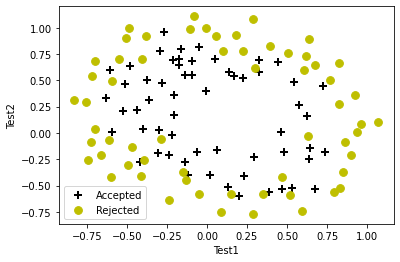

In [ ]:
plotData(data, "Test1", "Test2", "Accepted", "Rejected")

**Can this dataset be separated into positive and negative examples by a linear decision
boundary?** No, the data is not linearably seperable. Meaning we can't put a line straight through this data set and it would separate our accepted values and rejected values.

# Step 3, Editing functions and getting new variables

In [ ]:
X = np.c_[data[:,0:2]]
y = np.c_[data[:,2]]

In [ ]:
poly = PolynomialFeatures(6)
poly_feat = poly.fit_transform(X)
#poly = PolynomialFeatures(interaction_only = True)
#poly.fit_transform(X)
print(poly_feat)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


Here I am using sckit learn's polynomial features built in function with a degree of 6.

In [ ]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return(1 / (1 + np.exp(-z)))

In [ ]:
sigmoid(0)

0.5

In [ ]:
def costFunction(theta, X, y, lamb):
    m = y.size
    f = sigmoid(X.dot(theta))

    J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))
    #add regularization
    reg = (lamb/ (2*m)) * np.sum(np.square(theta[1:]))

    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [ ]:
def gradient(theta, X, y, lamb):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1,1)))
    reg = (lamb / (m)) * np.r_[[[0]], theta[1:].reshape(-1,1)]

    grad = (1/m)*poly_feat.T.dot(f-y) + reg

    return(grad.flatten())

Updating the cost and gradient functions to include the equations that were discussed in class.

In [ ]:
initial_theta = np.zeros(poly_feat.shape[1])
lamb = 0
cost = costFunction(initial_theta, poly_feat, y, lamb)
grad = gradient(initial_theta, poly_feat, y, lamb)
print('Cost: \n', cost)
print('Grad: \n', grad)
opt_theta_zero = minimize(costFunction, initial_theta, args=(poly_feat, y, lamb), method=None, jac=gradient, options={'maxiter':400})

Cost: 
 0.6931471805599454
Grad: 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [ ]:
initial_theta = np.zeros(poly_feat.shape[1])
lamb = 1
cost = costFunction(initial_theta, poly_feat, y, lamb)
grad = gradient(initial_theta, poly_feat, y, lamb)
print('Cost: \n', cost)
print('Grad: \n', grad)
opt_theta_one = minimize(costFunction, initial_theta, args=(poly_feat, y, lamb), method=None, jac=gradient, options={'maxiter':400})

Cost: 
 0.6931471805599454
Grad: 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [ ]:
initial_theta = np.zeros(poly_feat.shape[1])
lamb = 100
cost = costFunction(initial_theta, poly_feat, y, lamb)
grad = gradient(initial_theta, poly_feat, y, lamb)
print('Cost: \n', cost)
print('Grad: \n', grad)
opt_theta_onehundred = minimize(costFunction, initial_theta, args=(poly_feat, y, lamb), method=None, jac=gradient, options={'maxiter':400})

Cost: 
 0.6931471805599454
Grad: 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [ ]:
def classify(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [ ]:
p = classify(opt_theta_zero.x, poly_feat)
print('Train accuracy for lambda = 0 {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy for lambda = 0 88.13559322033899%


In [ ]:
p = classify(opt_theta_one.x, poly_feat)
print('Train accuracy for lambda = 1 {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy for lambda = 1 82.20338983050847%


In [ ]:
p = classify(opt_theta_onehundred.x, poly_feat)
print('Train accuracy for lambda = 100 {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy for lambda = 100 66.10169491525424%


Train accuracy 88.13559322033899%


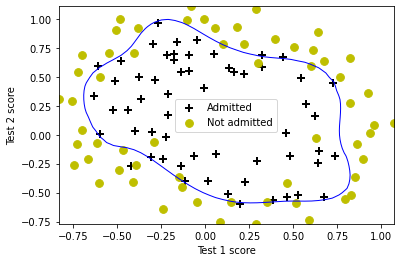

In [ ]:

plotData(data, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta_zero.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');
p = classify(opt_theta_zero.x, poly_feat)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 82.20338983050847%


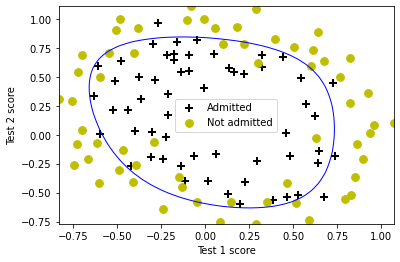

In [ ]:

plotData(data, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta_one.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');
p = classify(opt_theta_one.x, poly_feat)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 66.10169491525424%


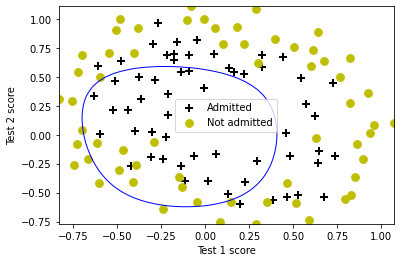

In [ ]:

plotData(data, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta_onehundred.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');
p = classify(opt_theta_onehundred.x, poly_feat)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

After implementing plots for each lambda value (zero, one, and 100) we can see that the training accuracy is higher when it is zero, and gets worse with a larger lambda value.
When lambda = 0 we get train accuracy: 88%, lambda = 1 we get train accuracy: 82%, and lambda = 100 we get train accuracy: 66%.